In [0]:
import numpy as np 
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
# %inline matplotlib.pyplot 

---
### Read the data from CSV files
---

In [3]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Four files has been imported in the form of DataFrame.

### Explanatory Data Analysis


In [4]:
print('Features : ', features.shape)
print('Stores   : ', stores.shape )
print('Test     : ', test.shape)
print('Train    : ', train.shape)

Features :  (8190, 12)
Stores   :  (45, 3)
Test     :  (115064, 4)
Train    :  (309679, 5)


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309679 entries, 0 to 309678
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         309679 non-null  int64  
 1   Dept          309679 non-null  int64  
 2   Date          309679 non-null  object 
 3   Weekly_Sales  309679 non-null  float64
 4   IsHoliday     309678 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


### Data Manipulation

---
#### Missing Value Treatment 
---

In [9]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

As we have few NaN for CPI and Unemployment, therefore we fill the missing values with their respective column mean. And as MarkDowns have more missing values we impute zeros in missing places respectively

In [0]:
# Treat Missing Values with their respective mean
features['CPI'] = features['CPI'].fillna(np.mean(features['CPI'] ))
features['Unemployment'] = features['Unemployment'].fillna(np.mean(features['Unemployment'] ))

# Treat Missing Values with zeroes
features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown1'].fillna(0)
features['MarkDown3'] = features['MarkDown1'].fillna(0)
features['MarkDown4'] = features['MarkDown1'].fillna(0)
features['MarkDown5'] = features['MarkDown1'].fillna(0)

In [11]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

<b> Missing values has been treated successfully. </b>

### Merging with the Train ndata
---

In [12]:
print(features.columns)
print(features.shape)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
(8190, 12)


In [13]:
print(train.columns)
print(train.shape)

print(stores.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
(309679, 5)
Index(['Store', 'Type', 'Size'], dtype='object')


In [0]:
# Merge feature and training data
new_df = pd.merge(features, train, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')

# merging(adding) all stores info with new training data
df = pd.merge(new_df, stores, on = ['Store'], how = 'inner')

In [15]:
print(new_df.shape)
print(df.shape)

(309678, 14)
(309678, 16)


In [16]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


### Merge test data

In [0]:
# Merge feature and training data
new_df_test = pd.merge(features, test, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')

# merging(adding) all stores info with new training data
df_test = pd.merge(new_df_test, stores, on = ['Store'], how = 'inner')

In [18]:
df_test.shape

(115064, 15)

In [19]:
df_test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,1,A,151315
1,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,2,A,151315
2,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,3,A,151315
3,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,4,A,151315
4,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,5,A,151315


<b> All data has been merge successfully. </b>

In [20]:
# Sort the data w.r.t 'Date' as we have time series problem
df = df.sort_values(by = 'Date')
df.head(20)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
78700,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,54,178.00,B,125833
78701,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,55,11123.56,B,125833
78702,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,56,769.32,B,125833
78703,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,59,241.86,B,125833
78704,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,67,3596.09,B,125833
78705,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,71,2479.26,B,125833
78706,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,72,51530.74,B,125833
78707,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,74,8076.88,B,125833
78708,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,79,14562.38,B,125833


---
## Explanatory data Anlysis
---

In [21]:
sizes = df.groupby('Type')['Size'].count()
print(sizes)

Type
A    158192
B    144330
C      7156
Name: Size, dtype: int64


In [22]:
# Number of distinct Store in the dataframe
df.groupby('Type')['Size'].nunique()

Type
A    15
B    15
C     1
Name: Size, dtype: int64

(-1.1009281144465075, 1.1194904033766584, -1.1, 1.1)

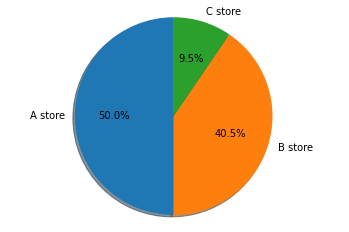

In [23]:
labels = 'A store','B store','C store'
sizes = [(21/(42))*100,(17/(42))*100,(4/(42))*100]
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.plt.show()

In [24]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


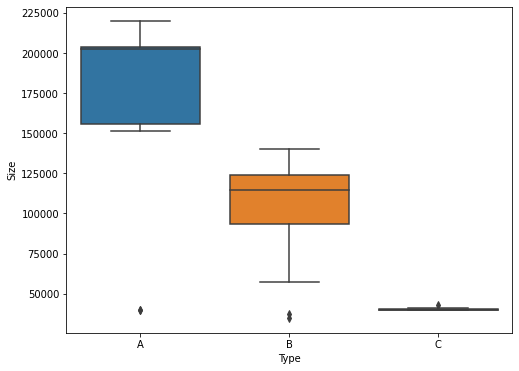

In [25]:
# Box plot for the size of the store

store_type_size = pd.concat([stores['Type'], stores['Size']], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = 'Type', y = 'Size', data= store_type_size)

By boxplot and piechart, we can say that type A store is the largest store and C is the smallest

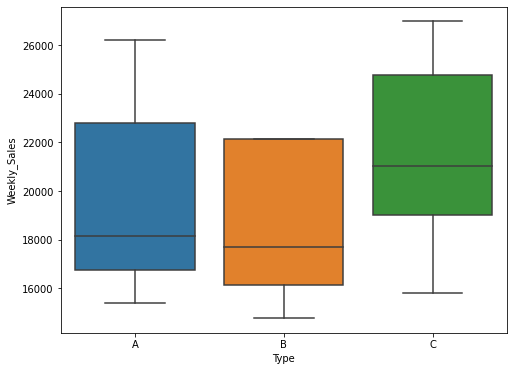

In [26]:
# boxplot for weekly sales for different types of stores 
store_sales = pd.concat([stores['Type'], train['Weekly_Sales']], axis = 1)
f1, ax1 = plt.subplots(figsize = (8, 6))
fig1 = sns.boxplot(x = 'Type', y = 'Weekly_Sales', data = store_sales, showfliers = False)

<b>
The median of A is the highest and C is the lowest i.e stores with more sizes have higher sales.
Sale is more on holidays as compare to other days
</b>

In [27]:
# Total count of sales on holidays and non-holidays
is_holiday = train[train.IsHoliday == True]
print('Sales on Holidays     : ', is_holiday['Weekly_Sales'].count())

non_holiday = train[train.IsHoliday == False]
print('Sales on Non-Holidays : ', is_holiday['Weekly_Sales'].count())

Sales on Holidays     :  21817
Sales on Non-Holidays :  21817


---
## Correlation
    Correlation is a bivariate analysis that measures the strength of association b/w two variable .
---

[]

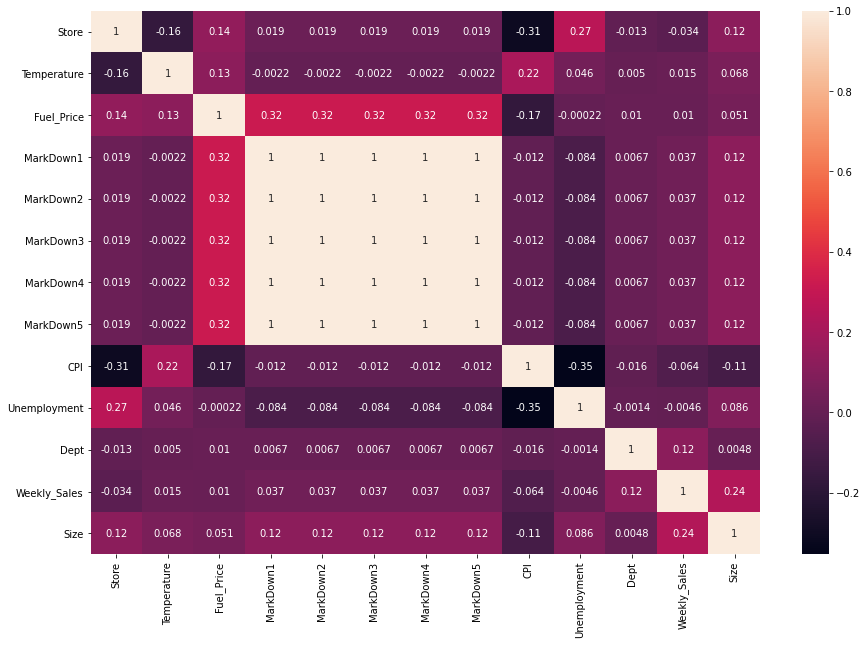

In [28]:
corr = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True)
plt.plot()

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

<big>
As we have seen in th heatmap, all markdowns are corelated with each other bacause we have filled it with zeroes
</big>


From the BiVariate analysis, we can say that we have imp cols from df as follows : 
    - Store
    - Tempreature
    - Fuel Price
    - CPI
    - Unemployement
    - IsHoliday
    - Dept
    - Weekly_Sales
    - Size
    


In [0]:
# exporting the correlation data into csv file
corr.to_csv('corelation.csv')

---
## Extracting new Dates, Years and holidays columns for train and test data
---

In [0]:
# Add column for Year Training dataset
df['year'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.year
# test dataset
df_test['year'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.year

# Add Column for the day
df['day'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.day
df_test['day'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.day

# Add column for days to next christmas for Training
df["Days to Next Christmas"] = (pd.to_datetime(df['year'].astype(str)+ "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

# testing
df_test["Days to Next Christmas"] = (pd.to_datetime(df_test['year'].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(df_test["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [32]:
df.head()
# print(df_test)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,year,day,Days to Next Christmas
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
78700,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,54,178.00,B,125833,2010,5,329
78701,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,55,11123.56,B,125833,2010,5,329
78702,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,56,769.32,B,125833,2010,5,329
78703,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,59,241.86,B,125833,2010,5,329


## Data Description
---

In [0]:
# dict(df.dtypes)

In [34]:
numeric_vars = [key for key in dict(df.dtypes) if dict(df.dtypes)[key]  in ['float64', 'float32', 'int32', 'int64']]
cat_vars = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

print(numeric_vars)
print(cat_vars)

['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'Weekly_Sales', 'Size', 'year', 'day', 'Days to Next Christmas']
['Date', 'IsHoliday', 'Type']


In [0]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [36]:
df_nums = df[numeric_vars]
continuous_summary = df_nums.apply(continuous_var_summary).round(2).T
continuous_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,309678.0,0.0,5.022757e+06,16.22,16.00,9.07,8.228000e+01,1.00,1.00,2.00,4.00,8.00,16.00,24.00,29.00,31.00,32.00,32.00
Temperature,309678.0,0.0,1.841315e+07,59.46,61.35,18.52,3.431200e+02,-2.06,17.94,26.58,33.18,46.14,61.35,73.52,83.36,87.16,91.65,99.22
Fuel_Price,309678.0,0.0,1.041841e+06,3.36,3.45,0.46,2.100000e-01,2.51,2.56,2.65,2.72,2.94,3.45,3.74,3.92,4.03,4.20,4.47
MarkDown1,309678.0,0.0,9.023102e+08,2913.70,0.00,6435.26,4.141260e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,88646.76
MarkDown2,309678.0,0.0,9.023102e+08,2913.70,0.00,6435.26,4.141260e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,88646.76
MarkDown3,309678.0,0.0,9.023102e+08,2913.70,0.00,6435.26,4.141260e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,88646.76
MarkDown4,309678.0,0.0,9.023102e+08,2913.70,0.00,6435.26,4.141260e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,88646.76
MarkDown5,309678.0,0.0,9.023102e+08,2913.70,0.00,6435.26,4.141260e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,88646.76
CPI,309678.0,0.0,5.357548e+07,173.00,185.75,39.77,1.581430e+03,126.06,126.11,126.60,129.09,132.75,185.75,214.49,220.85,222.98,225.63,227.23
Unemployment,309678.0,0.0,2.423476e+06,7.83,7.77,1.81,3.270000e+00,3.88,4.16,5.44,6.05,6.83,7.77,8.32,9.27,12.19,14.18,14.31


In [37]:
# create a statistics report for categorical variable
def categorical_vars_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

df_cat = df[cat_vars]
cat_summary = df_cat.apply(lambda x: categorical_vars_summary(x))
cat_summary.T

,N,NMISS,ColumnsNames
Date,309678,0,2011-11-25 2226 2011-12-23 2226 2011-12-...
IsHoliday,309678,0,False 287861 True 21817 Name: IsHolida...
Type,309678,0,A 158192 B 144330 C 7156 Name: Type...


### For testing data

In [38]:
numeric_vars_test = [key for key in dict(df_test.dtypes) if dict(df_test.dtypes)[key]  in ['float64', 'float32', 'int32', 'int64']]
cat_vars_test = [key for key in dict(df_test.dtypes) if dict(df_test.dtypes)[key] in ['object']]

print(numeric_vars_test)
print(cat_vars_test)

['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'Size', 'year', 'day', 'Days to Next Christmas']
['Date', 'Type']


In [39]:
# Continuous Variable Summary
df_test_nums = df_test[numeric_vars_test]
continuous_summary_test = df_test_nums.apply(continuous_var_summary).T.round(2)
continuous_summary_test

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.24,22.00,12.81,1.640900e+02,1.00,1.00,3.00,5.00,11.00,22.00,33.00,40.00,43.00,45.00,45.00
Temperature,115064.0,0.0,6.206760e+06,53.94,54.47,18.72,3.505900e+02,-7.29,11.44,23.98,29.97,39.82,54.47,67.35,79.48,83.82,92.14,101.95
Fuel_Price,115064.0,0.0,4.121070e+05,3.58,3.61,0.24,6.000000e-02,2.87,2.96,3.16,3.23,3.43,3.61,3.77,3.87,3.95,4.08,4.12
MarkDown1,115064.0,0.0,8.836063e+08,7679.26,4828.72,10695.41,1.143917e+08,-2781.45,17.01,178.43,448.82,1963.55,4828.72,9427.41,15325.04,23140.88,65757.57,103184.98
MarkDown2,115064.0,0.0,8.836063e+08,7679.26,4828.72,10695.41,1.143917e+08,-2781.45,17.01,178.43,448.82,1963.55,4828.72,9427.41,15325.04,23140.88,65757.57,103184.98
MarkDown3,115064.0,0.0,8.836063e+08,7679.26,4828.72,10695.41,1.143917e+08,-2781.45,17.01,178.43,448.82,1963.55,4828.72,9427.41,15325.04,23140.88,65757.57,103184.98
MarkDown4,115064.0,0.0,8.836063e+08,7679.26,4828.72,10695.41,1.143917e+08,-2781.45,17.01,178.43,448.82,1963.55,4828.72,9427.41,15325.04,23140.88,65757.57,103184.98
MarkDown5,115064.0,0.0,8.836063e+08,7679.26,4828.72,10695.41,1.143917e+08,-2781.45,17.01,178.43,448.82,1963.55,4828.72,9427.41,15325.04,23140.88,65757.57,103184.98
CPI,115064.0,0.0,2.019013e+07,175.47,172.46,33.78,1.141160e+03,131.24,131.28,131.75,132.32,138.90,172.46,201.21,224.64,227.25,228.64,228.98
Unemployment,115064.0,0.0,8.269065e+05,7.19,7.83,1.37,1.880000e+00,3.68,3.88,4.89,5.28,6.23,7.83,7.83,8.67,8.95,10.20,10.20


In [40]:
# Categorical Variable summary
df_cat_test = df_test[cat_vars_test]
cat_summary_test = df_cat_test.apply(categorical_vars_summary)
cat_summary_test

,Date,Type
N,115064,115064
NMISS,0,0
ColumnsNames,2012-12-21 3002 2012-12-07 2989 2012-12-...,"A 58713 B 44500 C 11851 Name: Type, d..."


As we have observed through statistics that needs to outlier treatment. (Either training or testing)

---
### Handling Outliers
---
#### There are some extreame high or extream low value which need to rectify so that it will not have impact on our model

In [0]:
def outlier_capping(x):
    # x = x.clip_upper(x.quantile(0.99))
    # x = x.clip_lower(x.quantile(0.01))
    x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    return x

df_nums = df_nums.apply(outlier_capping)

In [42]:
after_handle_outlier_summary = df_nums.apply(continuous_var_summary).round(2).T
after_handle_outlier_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,309678.0,0.0,5.022757e+06,16.22,16.00,9.07,8.228000e+01,1.00,1.00,2.00,4.00,8.00,16.00,24.00,29.00,31.00,32.00,32.00
Temperature,309678.0,0.0,1.842020e+07,59.48,61.35,18.37,3.374700e+02,17.94,17.94,26.58,33.18,46.14,61.35,73.52,83.36,87.16,91.65,91.65
Fuel_Price,309678.0,0.0,1.041664e+06,3.36,3.45,0.46,2.100000e-01,2.56,2.56,2.65,2.72,2.94,3.45,3.74,3.92,4.03,4.20,4.20
MarkDown1,309678.0,0.0,8.619391e+08,2783.34,0.00,5512.78,3.039071e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,31400.97
MarkDown2,309678.0,0.0,8.619391e+08,2783.34,0.00,5512.78,3.039071e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,31400.97
MarkDown3,309678.0,0.0,8.619391e+08,2783.34,0.00,5512.78,3.039071e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,31400.97
MarkDown4,309678.0,0.0,8.619391e+08,2783.34,0.00,5512.78,3.039071e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,31400.97
MarkDown5,309678.0,0.0,8.619391e+08,2783.34,0.00,5512.78,3.039071e+07,0.00,0.00,0.00,0.00,0.00,0.00,3690.95,9284.23,13396.45,31400.97,31400.97
CPI,309678.0,0.0,5.357328e+07,173.00,185.75,39.76,1.580630e+03,126.11,126.11,126.60,129.09,132.75,185.75,214.49,220.85,222.98,225.63,225.63
Unemployment,309678.0,0.0,2.423404e+06,7.83,7.77,1.80,3.250000e+00,4.16,4.16,5.44,6.05,6.83,7.77,8.32,9.27,12.19,14.18,14.18


In [0]:
# get the data into the csv files
continuous_summary.to_csv('after_handle_outlier_summary.csv')

In [44]:
df.dtypes

Store                       int64
Date                       object
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
IsHoliday                  object
Dept                        int64
Weekly_Sales              float64
Type                       object
Size                        int64
year                        int64
day                         int64
Days to Next Christmas      int64
dtype: object

## Creating dummies for categorical 
---

In [0]:
# df[['Date', 'IsHoliday']]

In [46]:
dummy = pd.get_dummies(df['Type'])
dummy.head()

,A,B,C
0,1,0,0
78700,0,1,0
78701,0,1,0
78702,0,1,0
78703,0,1,0


In [47]:
# Concatinating and drop type variable from the dataframe
df = pd.concat([df, dummy], axis = 1)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,year,day,Days to Next Christmas,A,B,C
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329,1,0,0
78700,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,54,178.00,B,125833,2010,5,329,0,1,0
78701,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,55,11123.56,B,125833,2010,5,329,0,1,0
78702,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,56,769.32,B,125833,2010,5,329,0,1,0
78703,9,2010-02-05,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,59,241.86,B,125833,2010,5,329,0,1,0


In [48]:
# Drop the type variable as we have created dummies
df = df.drop(['Type'], axis = 1)
df.shape

(309678, 21)

In [49]:
# As we have one more column IsHoliday
dummy1 = pd.get_dummies(df['IsHoliday'])
dummy1.head()

,False,True
0,1,0
78700,1,0
78701,1,0
78702,1,0
78703,1,0


    Creating Extra Holiday Variable.
    If that week comes under extra holiday then 1(=Yes) else 2(=No)

### Creating testing dummies

In [0]:
# df_test.Type

In [0]:
# Create and concat into dataframe
dummy_test = pd.get_dummies(df_test['Type'])
df_test = pd.concat([df_test, dummy_test], axis = 1)

In [52]:
df_test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size,year,day,Days to Next Christmas,A,B,C
0,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,1,A,151315,2010,5,-672,1,0,0
1,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,2,A,151315,2010,5,-672,1,0,0
2,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,3,A,151315,2010,5,-672,1,0,0
3,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,4,A,151315,2010,5,-672,1,0,0
4,1,2012-11-02,55.32,3.386,6766.44,6766.44,6766.44,6766.44,6766.44,223.462779,6.573,False,5,A,151315,2010,5,-672,1,0,0


    WE have created dummies for testing df so we can drop extra variable 'Type'

In [0]:
df_test = df_test.drop(['Type'], axis = 1)

In [54]:
df_test.shape

(115064, 20)

---
### Creating new variables fro special holidays
---

In [0]:
from datetime import datetime

In [0]:
# For training data
df['super_bowl'] = np.where((df['Date'] == datetime(2010,2,12)) | (df['Date'] == datetime(2011,2,11)) | (df['Date'] == datetime(2012,2,10)) | (df['Date'] == datetime(2013,2,8)),1,0)
df['labour_day'] = np.where((df['Date'] == datetime(2010,9,10)) | (df['Date'] == datetime(2011,9,9)) | (df['Date'] == datetime(2012,9,7)) | (df['Date'] == datetime(2013,9,6)),1,0)
df['thanks_giving'] = np.where((df['Date'] == datetime(2010,11,26)) | (df['Date'] == datetime(2011,11,25)) | (df['Date'] == datetime(2012,11,23)) | (df['Date'] == datetime(2013,11,29)),1,0)
df['christmas'] = np.where((df['Date'] == datetime(2010,12,31)) | (df['Date'] == datetime(2011,12,30)) | (df['Date'] == datetime(2012,12,28)) | (df['Date'] == datetime(2013,12,27)),1,0)


# For testing data
df_test['super_bowl'] = np.where((df_test['Date'] == datetime(2010,2,12)) | (df_test['Date'] == datetime(2011,2,11)) | (df_test['Date'] == datetime(2012,2,10)) | (df_test['Date'] == datetime(2013,2,8)),1,0)
df_test['labour_day'] = np.where((df_test['Date'] == datetime(2010,9,10)) | (df_test['Date'] == datetime(2011,9,9)) | (df_test['Date'] == datetime(2012,9,7)) | (df_test['Date'] == datetime(2013,9,6)),1,0)
df_test['thanks_giving'] = np.where((df_test['Date'] == datetime(2010,11,26)) | (df_test['Date'] == datetime(2011,11,25)) | (df_test['Date'] == datetime(2012,11,23)) | (df_test['Date'] == datetime(2013,11,29)),1,0)
df_test['christmas'] = np.where((df_test['Date'] == datetime(2010,12,31)) | (df_test['Date'] == datetime(2011,12,30)) | (df_test['Date'] == datetime(2012,12,28)) | (df_test['Date'] == datetime(2013,12,27)),1,0)

In [0]:
# Altering these holidays with 'IsHolidays'
df['IsHoliday'] = df['IsHoliday'] | df['super_bowl'] | df['labour_day'] | df['thanks_giving'] | df['christmas']
df_test['IsHoliday'] = df_test['IsHoliday'] | df_test['super_bowl'] | df_test['labour_day'] | df_test['thanks_giving'] | df_test['christmas']

In [58]:
print(df['IsHoliday'].value_counts())

False    287861
True      21817
Name: IsHoliday, dtype: int64


    All the extra holidays is merged with 'IsHolidays'.
    So, We can drop extra variable.

In [59]:
print(df.shape)
print(df_test.shape)
df.columns

(309678, 25)
(115064, 24)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Size', 'year', 'day',
       'Days to Next Christmas', 'A', 'B', 'C', 'super_bowl', 'labour_day',
       'thanks_giving', 'christmas'],
      dtype='object')

In [60]:
df_test.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Size', 'year', 'day', 'Days to Next Christmas',
       'A', 'B', 'C', 'super_bowl', 'labour_day', 'thanks_giving',
       'christmas'],
      dtype='object')

In [61]:
drop_extra = ['super_bowl', 'labour_day', 'thanks_giving', 'christmas']
# Training
df.drop(drop_extra, axis = 1, inplace = True)
print(df.shape)

# Testing
df_test.drop(drop_extra, axis = 1, inplace = True)
print(df_test.shape)

(309678, 21)
(115064, 20)


    Extra variable dropped successfully.

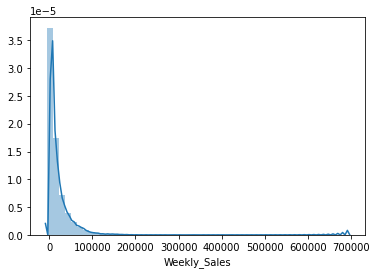

In [62]:
sns.distplot(df.Weekly_Sales)

In [63]:
# df['Weekly_Sales'][df.Weekly_Sales < 0]
df.Weekly_Sales.skew()

3.186261554775628

In [64]:
df.loc[df.Weekly_Sales < 0, 'Weekly_Sales']

78698     -15.00
286569    -12.99
48832     -59.00
293759    -12.00
138174     -0.04
           ...  
167302    -11.00
286534   -178.15
177184    -11.51
187305    -18.00
197495     -3.97
Name: Weekly_Sales, Length: 878, dtype: float64

    We have found that our 'Y' variable is having a negative values.

In [0]:
df.loc[df.Weekly_Sales < 0, 'Weekly_Sales'] = 0

    We have filled negative values to 'Zero' as per the instruction.
    We can't take log of negative values.

In [66]:
# Taking log of 'Y' values = Weekly_Sales
a = np.log(df.Weekly_Sales)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
# a.skew()
# sns.distplot(a)

---
## Feature Selection
---

In [68]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Size', 'year', 'day',
       'Days to Next Christmas', 'A', 'B', 'C'],
      dtype='object')

#### Dropping irrelevant variable


    As we have seen, all markdown is highly correlated with each other, but We can not drop all markdowns.
    Markdown5 is highly skewed so we can drop markdown5.
    
    

In [69]:
# Make a list for variables which we can drop
drop_features = ['MarkDown5']
drop_features

['MarkDown5']

In [0]:
df = df.drop(drop_features, axis = 1)

In [71]:
df.shape

(309678, 20)

   
    After Selecting and dropping the variable, now we can proceed for building model for prediction.
    We can try different technique for better accuracy as follows : 
        - Decision tree
        - Ensemble Linear regressor
        - Random Forest
        - Boosting

In [72]:
# Splitting the data
feature_columns = df.columns.difference(['Weekly_Sales', 'Date'])
feature_columns

Index(['A', 'B', 'C', 'CPI', 'Days to Next Christmas', 'Dept', 'Fuel_Price',
       'IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'Size',
       'Store', 'Temperature', 'Unemployment', 'day', 'year'],
      dtype='object')

In [73]:
feature_columns.shape

(18,)

In [0]:
# df_test[feature_columns]

In [0]:
# Import the required library
from sklearn.model_selection import train_test_split

In [0]:
#train-test split
X_train,X_test,y_train,y_test = train_test_split( df[feature_columns], df['Weekly_Sales'], 
                                                     test_size = 0.20, random_state = 0)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((247742, 18), (61936, 18), (247742,), (61936,))

In [78]:
X_train.columns

Index(['A', 'B', 'C', 'CPI', 'Days to Next Christmas', 'Dept', 'Fuel_Price',
       'IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'Size',
       'Store', 'Temperature', 'Unemployment', 'day', 'year'],
      dtype='object')

Store
- Temperature
- Fuel_Price
- CPI
- Unemployment
- Dept
- Size
- IsHoliday
- MarkDown1 - 4
- Year
- Days
- Days Next to Christmas
- A , B, C

## Standardizing train and test data :
---

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
# Standardize with the test file data
df_test_sc = sc_X.fit_transform(df_test[feature_columns])

---
## Linear Regression
---

In [0]:
from sklearn.linear_model import LinearRegression

# Checking errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [82]:
# Initialize and fit the data into the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict( X_train )
y_train_pred

array([23615.10170418, 24689.70463311, 17283.96273607, ...,
       25368.44844947,  7589.7349538 , 13521.95055248])

In [0]:
# Predicting for test
y_test_pred = linreg.predict( X_test )

In [84]:
df_test_pred = pd.DataFrame({'actual' : y_test,
                                'Predicted' : y_test_pred})
df_test_pred.head(10)

,actual,Predicted
52607,7681.88,26581.120266
64533,33294.89,9028.753127
129125,478.00,23620.693669
144610,285.82,21540.720656
13494,8036.41,26377.798477
23601,2540.44,2734.250384
284386,1741.74,4319.318894
288027,14388.60,5385.374989
157565,7689.49,12872.333899
185163,12155.78,21870.550564


In [85]:
# Calculating Mean Absoluate Error
print('Train MAE : ', mean_absolute_error(y_train, y_train_pred).round(2))
print('Test MAE  : ', mean_absolute_error(y_test, y_test_pred).round(2))


Train MAE :  15341.64
Test MAE  :  15310.73


In [86]:
# Calculate Root Mean Squared Error
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, y_train_pred)).round(2))
print('Test  RMSE : ', np.sqrt(mean_squared_error(y_test, y_test_pred)).round(2))

Train RMSE :  22972.72
Test  RMSE :  22683.27


    We have seen that both the accuracy measure not having the much difference between them.

In [87]:
accuracy = np.round(linreg.score( X_test, y_test) * 100, 3)
print('Linear Regression Accuracy : ', accuracy )

Linear Regression Accuracy :  8.44


    We have got the accuracy of 89% with the test data.

In [88]:
# Prediction with the testfile that we prepared 
linreg.predict(df_test_sc)

array([-7.16143728e+14, -7.16143728e+14, -7.16143728e+14, ...,
       -1.12353756e+15, -1.12353756e+15, -1.12353756e+15])

---
## Decision Tree Regressor
---

In [0]:
# Import  the Tree Library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [90]:
# Initialize the Model object and fit the data
dtr = DecisionTreeRegressor(random_state = 453)
# dtr.fit(train_X, train_Y)
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=453, splitter='best')

### Tuning the parameter 

In [0]:
param_grid = { 'max_features' : np.arange(10,18),
                'max_depth' : np.arange(2,12)}

In [92]:
# Finding the best parameter for decision tree
tree = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([10, 11, 12, 13, 14, 15

In [93]:
print('Best Score      : ', tree.best_score_)
print('Best parameters : ', tree.best_params_)
print('Best Estimators : ', tree.best_estimator_)

Best Score      :  0.8984326079908256
Best parameters :  {'max_depth': 11, 'max_features': 17}
Best Estimators :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=17, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [94]:
# Again build a model with fine tuned parameters
final_tree = DecisionTreeRegressor(max_depth = 11, max_features = 17)

# Fit the model 
final_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=17, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [95]:
dt_train_pred = final_tree.predict(X_train)
dt_train_pred

array([ 2874.3250189 ,   398.56832365, 34955.115625  , ...,
        7624.95638807,  2604.64990818,  1525.57097625])

### Feature Importance 

In [96]:
pd.DataFrame({'Features' : feature_columns, 
              'Importance ' : final_tree.feature_importances_})
# df[feature_columns].shape

,Features,Importance
0,A,0.121862
1,B,0.000469
2,C,0.000109
3,CPI,0.026241
4,Days to Next Christmas,0.035819
5,Dept,0.687348
6,Fuel_Price,0.000576
7,IsHoliday,0.000024
8,MarkDown1,0.000028
9,MarkDown2,0.000157


In [97]:
y_pred_dtr = final_tree.predict( X_test )
y_pred_dtr

array([ 4090.98564972, 31620.63441441,   263.70987203, ...,
       10727.16136364, 10799.24356504,   260.94737069])

In [98]:
pd.DataFrame({'actual' : y_test,
                 'Predicted' : y_pred_dtr})

,actual,Predicted
52607,7681.88,4090.985650
64533,33294.89,31620.634414
129125,478.00,263.709872
144610,285.82,281.037054
13494,8036.41,6884.648779
...,...,...
50152,54016.51,52773.195460
176279,7828.21,8383.028889
218918,9393.30,10727.161364
233410,3629.55,10799.243565


---
### Calculating Error for DT
---

In [99]:
# Mean Absolute Errors
print('Train DT MAE : ', mean_absolute_error(y_train, dt_train_pred).round(2))
print('Test  DT MAE : ', mean_absolute_error(y_test, y_pred_dtr).round(2))

Train DT MAE :  3784.87
Test  DT MAE :  3876.43


In [100]:
# Root Mean Squared Error
print('Train DT RMSE : ', np.sqrt(mean_squared_error(y_train, dt_train_pred)).round(2))
print('Test  DT RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_dtr)).round(2))

Train DT RMSE :  7101.32
Test  DT RMSE :  7418.03


In [101]:
# Calculating accuracy on test data
print('Accuracy : ', np.round(final_tree.score(X_test, y_test) * 100, 2))

Accuracy :  90.21


    We got 89% Accuracy on test data.

In [102]:
# Prediction for new file that we prepared as well.
final_tree.predict(df_test_sc)

array([16839.29814815, 35830.31778761, 23118.40520913, ...,
       22300.13785714, 39466.52666667,  3916.59877551])

---
## Ensemble Methods
---

In [0]:
# import lib
from sklearn.ensemble import BaggingRegressor

In [104]:
bagreg = BaggingRegressor(oob_score = True, n_estimators = 100, n_jobs = -1, verbose = 0)
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100, n_jobs=-1,
                 oob_score=True, random_state=None, verbose=0,
                 warm_start=False)

In [105]:
bagreg.predict(X_train)

array([ 1312.7176,   326.6103, 34553.1636, ...,  3192.5843,  7679.0298,
        1419.0457])

In [106]:
bagreg.oob_score_

0.9775262440375274

In [107]:
bagreg_pred_test = pd.DataFrame({'actual' : y_test,
                'Predicted' : bagreg.predict(X_test)})
bagreg_pred_test

,actual,Predicted
52607,7681.88,8242.8613
64533,33294.89,33896.1166
129125,478.00,241.9850
144610,285.82,269.0679
13494,8036.41,8180.0465
...,...,...
50152,54016.51,53724.0749
176279,7828.21,8125.0262
218918,9393.30,9908.0439
233410,3629.55,5267.0457


In [108]:
bagreg_train_pred = bagreg.predict(X_train)
bagreg_train_pred

array([ 1312.7176,   326.6103, 34553.1636, ...,  3192.5843,  7679.0298,
        1419.0457])

In [109]:
bagreg_test_pred = bagreg.predict(X_test)
bagreg_test_pred

array([ 8242.8613, 33896.1166,   241.985 , ...,  9908.0439,  5267.0457,
          45.6827])

## Bagging Claasifier Errors

In [110]:
# Mean Absolute Errors
print('Bag Train MAE : ', mean_absolute_error(y_train, bagreg_train_pred))
print('Bag Test  MAE : ', mean_absolute_error(y_test, bagreg_test_pred))

Bag Train MAE :  534.9189055456886
Bag Test  MAE :  1427.0759788491343


In [111]:
# Root Mean Squared Errors
print('BagReg Train RMSE :', np.sqrt(mean_squared_error(y_train, bagreg_train_pred)))
print('BagReg  Test RMSE :', np.sqrt(mean_squared_error(y_test, bagreg_test_pred)))

BagReg Train RMSE : 1326.5862410770258
BagReg  Test RMSE : 3331.808570207415


## Initiating the Estimators with GridSearchCV

In [0]:
# pargrid_bagging = {'n_estimators': [20,50,100,200,250,300,350,400]}

# gscv_bagging = GridSearchCV(estimator=BaggingRegressor(), 
#                         param_grid = pargrid_bagging, cv = 5,
#                         verbose = 1)

In [0]:
# gscv_results = gscv_bagging.fit(X_train, y_train)

---
### Not able to run BaggingResressor with GridSearchCV and its showing memory leak and also tried without using n_jobs = -1
---

---
## Random Forest Regressor
---

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
paragrid_rf = {'n_estimators': [100,150,200,250,300,350,400]}
                  # 'max_features': [7,8,9,10,11,12,13,14,15]}

In [0]:
#from sklearn.grid_search import GridSearchCV
gscv_rf = GridSearchCV(estimator = RandomForestRegressor(), 
                        param_grid = paragrid_rf, 
                        cv = 5,
                        verbose = True)

# gscv_results = gscv_rf.fit(X_train, y_train)

In [117]:
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15)        
rfr.fit(X_train,y_train)
# y_pred=rfr.predict(X_test)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred_train = rfr.predict(X_train)

In [119]:
pd.DataFrame({'Actual' : y_train,
              'Predict' : y_pred_train})

,Actual,Predict
19654,1361.00,1111.045445
134303,352.00,370.370962
274917,34264.15,34658.070631
55128,40401.85,40441.761702
267307,9.97,15.174474
...,...,...
289318,1356.04,1525.369870
226728,7369.08,7146.894151
231920,2593.48,5499.884739
62721,8595.60,4348.123321


In [0]:
predict_rfr = rfr.predict(X_test)

In [121]:
pd.DataFrame({'Actual': y_test,
              'Predicted' : predict_rfr})

,Actual,Predicted
52607,7681.88,7334.314457
64533,33294.89,33374.033164
129125,478.00,298.473837
144610,285.82,247.203838
13494,8036.41,8673.988641
...,...,...
50152,54016.51,52307.195152
176279,7828.21,8041.935479
218918,9393.30,9769.438671
233410,3629.55,4963.071970


---
## Calculating Errors for Random Forest
---

In [122]:
# Mean Absolute Errors
print('Train DT MAE : ', mean_absolute_error(y_train, y_pred_train).round(2))
print('Test  DT MAE : ', mean_absolute_error(y_test, predict_rfr).round(2))

Train DT MAE :  1680.71
Test  DT MAE :  2006.21


In [123]:
# Root Mean Squared Error
print('Train DT RMSE : ', np.sqrt(mean_squared_error(y_train, y_pred_train)).round(2))
print('Test  DT RMSE : ', np.sqrt(mean_squared_error(y_test, predict_rfr)).round(2))

Train DT RMSE :  3283.14
Test  DT RMSE :  4157.27


In [124]:
# Calculating accuracy on test data
print('Accuracy : ', np.round(rfr.score(X_test, y_test) * 100, 2))

Accuracy :  96.92


  We got 96.77% of Accuracy with Random Forest regressor

In [125]:
# Prediction for new file that we prepared as well.
rfr.predict(df_test_sc)

array([19825.16002757, 35967.90301929, 23597.16593065, ...,
       14136.71624671, 36823.51249589,  8788.41356984])

In [126]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "MAE", "RMSE", "Accuracy"]

x.add_row(["Linear Regression (Baseline)", 14567, 21762, 8.93])
x.add_row(["DecisionTreeRegressor", 3682, 7186, 90.07])
x.add_row(["RandomForestRegressor", 1874, 4100, 96.77])

print(x)

+------------------------------+-------+-------+----------+
|            Model             |  MAE  |  RMSE | Accuracy |
+------------------------------+-------+-------+----------+
| Linear Regression (Baseline) | 14567 | 21762 |   8.93   |
|    DecisionTreeRegressor     |  3682 |  7186 |  90.07   |
|    RandomForestRegressor     |  1874 |  4100 |  96.77   |
+------------------------------+-------+-------+----------+


    We got the best accuracy with the Random Forest regressor.

In [132]:
# Prediction value using Random Forest model..
submission = pd.DataFrame({
        "Store_Dept_Date": df.Store.astype(str) + '_' + df.Dept.astype(str) + '_' + df.Date.astype(str),
        "Weekly_Sales": pd.Series(predict_rfr)
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
submission.to_excel(writer,'Weekly_sales Pred',index=False)

NameError: ignored

---
## *******  END  *******
---